# Instructions

1. Download the provided jupyter notebook file to your computer.
2. Write all your answers and code into this notebook file.
3. When your work is completed, export your notebook to an HTML file.
4. Submit your HTML file and a copy of the notebook to the assignment page on Moodle.



## Identification

### Your Information

Your Last Name: Siddique

Your First Name: Muhammad Saad


### Group Members (list any classmates you worked with on this problem set)

Your Group Members:

# Textbook Reading

The three required readings for this week are textbook chapters relating to ensemble methods and an application of random forests to predicting housing data.

1. ISLP - Chapter 8, Section 8.2. You may optionally read section 8.2.4 on Bayesian Additive Regression Trees, but we will not cover this material directly in class. 
2. Géron - Chapter 7. A guide on implementing Boosting and Random Forests in `sklearn`. You may optionally read the sections on AdaBoost and Stacking, but we will not cover this material directly in class.
3. Yoon, Jaehyun. "Forecasting of real GDP growth using machine learning models: Gradient boosting and random forest approach." Computational Economics 57.1 (2021): 247-265. This paper attempts to use Random Forests and a Boosting model to predict GDP Growth. Skim the article with a focus on Tables 4 and 5 for a summary of model performance (but feel free to read the whole thing if interested). 

There is one optional reading for the week.

1. Muchlinski, D., Siroky, D., He, J., & Kocher, M. (2016). Comparing Random Forest with Logistic Regression for Predicting Class-Imbalanced Civil War Onset Data. Political Analysis, 24(1), 87-103.

This paper builds on the models for predicting civil war onset that we studied at the end of the Autumn Term. If interested, I highly recommend the reading to see the improvements in performance of these models, but I decided to keep it optional if people were uninterested in reviewing that same topic.

# Additional Readings on Detecting and Correcting Biased Algorithms

There are two additional readings provided with the problem set files. One is a New York Times article by Sendhil Mullainathan about an examination into detecting and correcting bias in a medical study. The other file is the paper by Obemeyer, Powers, Vogeli and Mullainathan referenced in the NYT article. 

Please read both of these brief articles. After reading, briefly summarise (1-2 paragraphs) both the optimistic and pessimistic views of the role of algorithms on bias. 

Based on the two readings, here are the optimistic and pessimistic views on algorithms and bias:

*The Optimistic View:*
Mullainathan argues that algorithmic bias, while harmful, is actually easier to detect and fix than human bias. Unlike the painstaking work required to uncover human discrimination (like the resume study that required months of covert operations), algorithmic bias can be uncovered through straightforward statistical analysis. More importantly, once discovered, algorithmic bias can be remedied relatively quickly—the authors built a prototype fix and the algorithm manufacturer also corrected the problem independently. As Mullainathan notes, "changing algorithms is easier than changing people: software on computers can be updated; the 'wetware' in our brains has so far proven much less pliable." With proper regulation and oversight, algorithms could actually help reduce discrimination by making bias visible and correctable in ways that human decision-making is not.

*The Pessimistic View:*
However, the readings also highlight significant concerns. The healthcare algorithm case demonstrates how seemingly reasonable choices—using healthcare costs as a proxy for health needs—can encode and amplify existing structural inequalities. Because society spends less on Black patients, the algorithm systematically underestimated their health needs, affecting millions of people. Moreover, proper regulation doesn't currently exist, and that fixing algorithms won't resolve the "deep, structural bias that continues to plague the United States." The camera analogy (equipment calibrated for white skin) illustrates how algorithms can fail to account for diversity, perpetuating historical biases in new technological forms. While the algorithm itself can be fixed, it doesn't address the underlying inequalities in healthcare access and spending that created the bias in the first place.

In [96]:
# Standard Packages
import numpy as np
import pandas as pd

# sklearn packages for model fitting and evaluation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error

# Loading in trees and their functionality
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
# Packages for visualizing the tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.utils import resample

# Plotting
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from plotnine import *



# Educational Achievement in Portugal Continued

In last week's problem set you used simple decision trees to predict educational outcomes in Portugal. Here, I will ask you to revisit this data to see if bagging or random forest approaches generate improved predictions. See last week's problem set for a full description of the data, which is again provided in the `students.csv` file.

As a reminder, our goal will be to predict the continuous measure `G3` as a function of all other variables in the data set expect for the variables `G1` and `G2`. `G1` and `G2` should be dropped from your analysis.

## Training / Testing Split

Split your data into a training sample that contains 70% of the total observations. Set the same random split as your problem set from last week to keep results comparable (`random_state=422`).

## Pre-processing the Data - Repeated From Last Problem Set

Remember to pre-process the data in any ways you feel are appropriate based on your analysis from last week.

In [2]:
# Your code here:
school = pd.read_csv('students.csv')
categorical_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
    'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 
    'nursery', 'higher', 'internet', 'romantic'
]

numeric_cols = [
    'age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences'
]


school_intial_x = school[categorical_cols + numeric_cols]
school_y = school['G3']

school_x = pd.get_dummies(school_intial_x, columns=categorical_cols, drop_first=True)
school_x.shape

X_train, X_test, y_train, y_test = train_test_split(school_x, school_y, test_size=0.3, random_state=422)

## Fitting a Bagging Estimator By Hand

This problem asks you to create a bagging estimator by hand by simulating your own bootstrap samples. There are packages that allow you fit this model more easily, but here I ask you to fit things by hand to:

* Improve your understanding of what the algorithm is doing
* Practice saving, storing and working with results from multiple models in python

To fit the bagging estimator do the following.

1. Take a bootstrap sample of the _training_ data
2. Fit an unrestricted decision tree model to the _bootstrap sample_ from Step 1
3. Use your model from Step 2 to predict values for the _testing_ data
4. Store your predictions from Step 3
5. Repeat Steps 1-4 for `300` iterations

Note, you should only conduct a training / testing split of the data once, but you will generate 300 different bootstrap samples, all to be drawn from the training data.

The [resample](https://scikit-learn.org/stable/modules/generated/sklearn.utils.resample.html) function may be useful for creating your bootstrap samples, which can be loaded with the following code. You can use this function to sample the row ids for the bootstrap and then filter to these row ids.

```python
from sklearn.utils import resample
```

After following the above steps, calculate the average prediction for each observation in the testing data. What is the MSE of your model from using this average prediction, and how does it compare to your MSE measures form last week's problem set?

In [67]:
prediction_dict = {}
for i in range(1, 301):
    X_boot, y_boot = resample(X_train, y_train, replace=True)
    decision_tree = DecisionTreeRegressor()
    decision_tree.fit(X_boot, y_boot)
    preds = decision_tree.predict(X_test)
    prediction_dict[f'prediction {i}'] = preds

In [68]:
average_pred_across_trees = np.mean([prediction_dict[key] for key in prediction_dict], axis=0)
MSE = mean_squared_error(y_true = y_test , y_pred = average_pred_across_trees )
print(f'MSE through iteration is {round(MSE, 2)}')

MSE through iteration is 6.48


In [74]:
decision_tree_comparison = DecisionTreeRegressor()
decision_tree_comparison.fit(X_train , y_train)
MSE_comparison = mean_squared_error(y_test , decision_tree_comparison.predict(X_test))
print(f"MSE for single decision tree without depth parameter is {round(MSE_comparison , 2)}")

MSE for single decision tree without depth parameter is 13.88


In the previous problem set, the MSE obtained after running the grid search was 7.65 using three features. In the current analysis, the MSE is 6.48, which is lower than the earlier result. However, the earlier model imposed a maximum depth constraint, whereas in this case we did not specify a depth parameter.

To ensure a fair comparison, I ran a decision tree model without specifying a maximum depth and computed the MSE. Under this unrestricted setting, the MSE increases to 13.88.

## Plotting Accuracy as a Function of the Number of Trees

Using your stored predictions from the question above, create a plot similar to Figure 8.8 from the textbook chapter. Your plot should show:

* The number of trees on the x-axis
* The testing error from a bagging estimator using this number of trees on the y-axis

Comment on the observed patterns. Do you think adding additional bootstrap samples / trees will improve your model's predictive performance?

Hint: the testing error rate for 1 tree should be the error from using only the single predictions from your __first__ prediction tree. The testing error rate for 2 trees should be the error from using the average of your first two prediction trees. The testing error rate for 3 trees should be the error from using the average of your first three prediction trees, and so on. See if you can calculate these rolling averages using either `pandas` or `numpy`.

In [91]:
avg_dict = {}
testing_error_rate_list = []
cumsum = np.zeros_like(prediction_dict['prediction 1'])

for i in range(len(prediction_dict)):
    cumsum += prediction_dict[f'prediction {i+1}']
    avg_dict[i] = cumsum / (i + 1)
    testing_error_rate_list.append(mean_squared_error(y_test, avg_dict[i]))

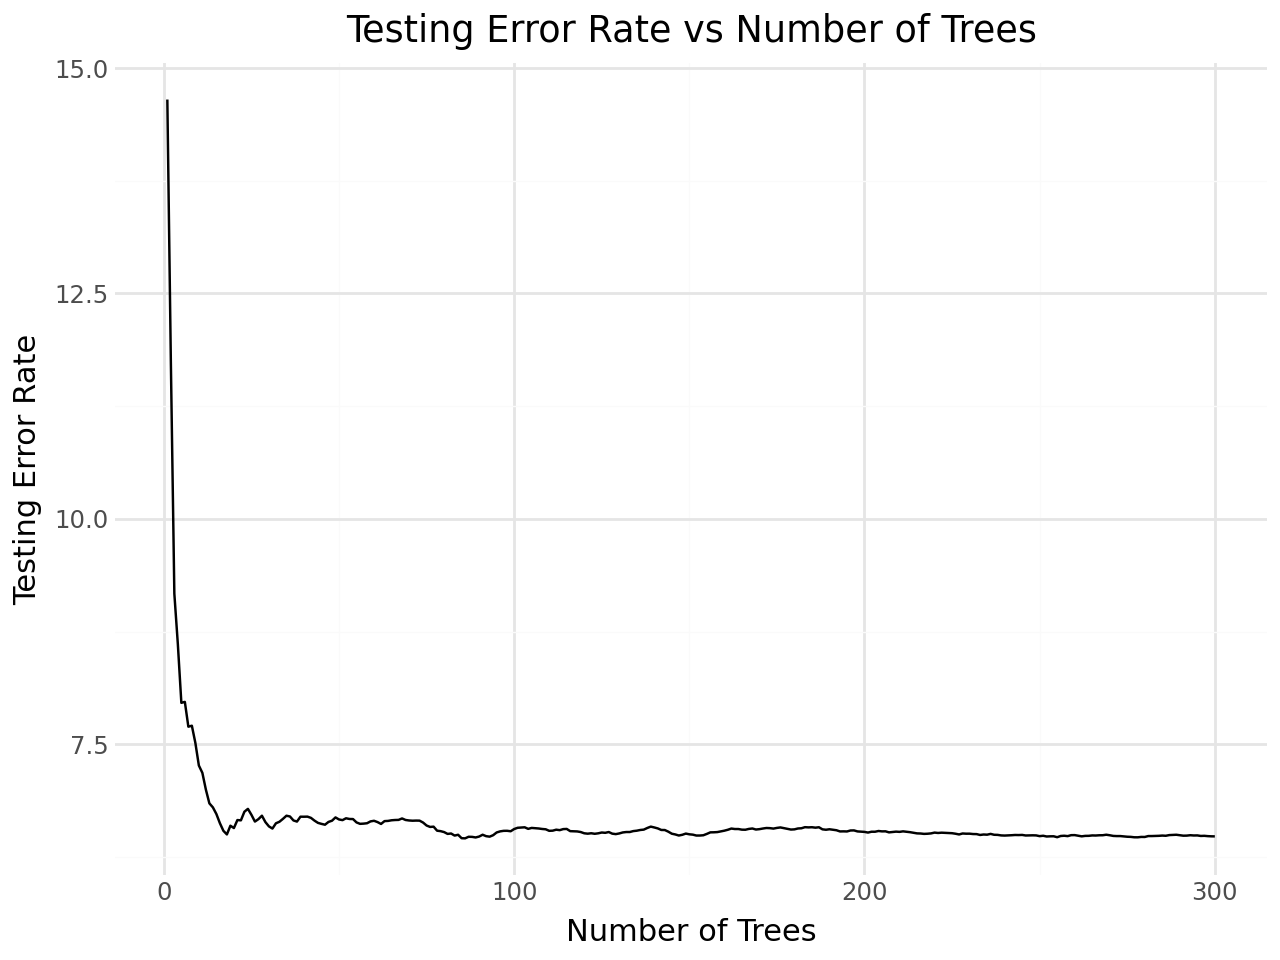

In [94]:
plot_df = pd.DataFrame({
    'n_trees': range(1, len(testing_error_rate_list) + 1),
    'error_rate': testing_error_rate_list
})

(
    ggplot(plot_df, aes(x='n_trees', y='error_rate'))
    + geom_line()
    + labs(x='Number of Trees', y='Testing Error Rate', title='Testing Error Rate vs Number of Trees')
    + theme_minimal()
)

It follows the same pattern as the garph in the textbook, as we increase the number of trees, the testing error rate decrease. It shows a steep decline until until 4 trees and the it shows a fluctuating pattern, eventually settling to 6.5 beyong 150 trees. If we increase the no of trees, there is a less likelihood of it declining as we see more or less a straight line from 150 trees to 300 trees.

## Fitting a Random Forest Model

Fit a Random Forest Model. Note, you can use the [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) function to fit this model. Set the `max_features` argument to "sqrt". How does this random forest model compare to your results from bagging and your results from the decision trees fit in last week's problem set?

In [97]:
school_random_forest = RandomForestRegressor(max_features='sqrt')
school_random_forest.fit(X_train , y_train)
pred_random_forest = school_random_forest.predict(X_test)
mean_squared_error(y_true=y_test , y_pred= pred_random_forest)

6.2774600000000005

The Random Forest model achieves the lowest testing error, with an MSE of 6.27. In comparison, the testing MSE for the bagging model and the decision tree with grid search from last week were 6.40 and 7.65, respectively.

## Explaining the Difference Between Bagging and a Random Forest

The main difference between the two models lies in their use of features. While both bagging and Random Forest rely on bootstrapping to create multiple samples, the key distinction is how features are handled at each split. Bagging uses all available features for every bootstrapped sample, whereas Random Forest uses a random subset of features, which in this case is six, for each split.

This feature subsampling helps decorrelate the trees. If a particular variable has a strong influence, bagging tends to produce similar trees that repeatedly assign high importance to that variable, leading to highly correlated predictions across bootstrap samples. Random Forest mitigates this issue by restricting the feature set at each split, resulting in more diverse trees and improved overall performance.

## Variable Importance

Report the variable importance measures for the Random Forest model. Which variables are most predictive for student language scores in this model?

Use the `feature_importances_` information saved in your final model.

In [102]:
pd.Series(school_random_forest.feature_importances_,
          index=X_train.columns).sort_values(ascending=False)

failures             0.104777
absences             0.057588
school_MS            0.050078
studytime            0.044735
goout                0.043850
higher_yes           0.042779
age                  0.042393
famrel               0.042138
Walc                 0.040113
health               0.039992
freetime             0.039050
Medu                 0.037814
Dalc                 0.035842
Fedu                 0.034180
traveltime           0.026406
address_U            0.024708
famsup_yes           0.018899
activities_yes       0.018376
reason_reputation    0.017530
romantic_yes         0.016447
guardian_mother      0.016091
internet_yes         0.015870
sex_M                0.015609
Fjob_services        0.015436
schoolsup_yes        0.015294
Mjob_other           0.015293
Mjob_teacher         0.015183
famsize_LE3          0.015055
Fjob_other           0.013808
reason_home          0.013015
reason_other         0.012604
nursery_yes          0.011138
Pstatus_T            0.009804
Mjob_servi

Failure holds the highest importance followed by absences and school_MS

# Re-examining the OSHA Data

In the summative problem set in the Autumn Term you were tasked with forecasting workplace injury rates. A copy of this data has been provided. In this problem you will test if tree based methods can improve performance of these predictions.

## Loading in and Splitting the Data

After reading in the data. Use the following code to replicate the splitting procedure done for the Autumn Term Problem Set.

Note this code assumes the data was originally saved in a variable named `osha`.

Recall that we considered both a continuous outcome variable `injury_rate` and a binary predictor `high_injury_rate` of whether a site had a high injury rate. The below code saves these different measures as `y_c_train` for the continuous outcome measure in the training data and `y_b_train` for the binary outcome in the training data. The same naming convention is used for other splits in the data.

In [111]:
osha = pd.read_csv('osha_2025.csv')
rm_vars = ['sst_year', 'estab_id_duns', 'injuries', 'injury_rate', 'high_injury_rate']


osha_train, osha_test = train_test_split(osha, test_size=0.3, random_state=407)

y_c_train = osha_train['injury_rate']
y_c_test = osha_test['injury_rate']
y_b_train = osha_train['high_injury_rate']
y_b_test = osha_test['high_injury_rate']

X_osha_train = osha_train.drop(labels=rm_vars, axis=1)
X_osha_test = osha_test.drop(labels=rm_vars, axis=1)

## Continuous Outcome Prediction

Focusing first on the continuous outcome measure, fit the following models.

1. A Bagging estimator. You may use the `BaggingRegressor` to automate this process for this problem. Allow your decision trees to be grown without restrictions. Decide on the appropriate number of estimators (trees) you wish to grow and specify this with the `n_estimators` argument. 
2. Random Forest. Using cross-validation, consider a range of possible `max_features` on either side of the default measure to see how sensitive the model is to this parameter. Do not try to conduct an exhaustive search to determine this parameter.

For each model, calculate and report the MSE and RMSE of your model in the training data and the testing data. How does the model performance compare to the results from the regression models used in the Autumn Term problem set? Note, it is possible the new models used in this problem set may or may not improve predictions depending on the exact parameters selected.

__Note:__ The `osha` data set has significantly more observations and features than the `students` data set you used above. It may take several minutes for your models to fit. As a general rule, begin by fitting your model with a small range of parameters to confirm the code runs without errors before scaling up to a larger search of the parameter space.

In [114]:
from sklearn.ensemble import BaggingRegressor
osha_bagging_regressor = BaggingRegressor(n_estimators=100)
osha_bagging_regressor.fit(X_osha_train , y_c_train)
osha_bagging_pred_test = osha_bagging_regressor.predict(X_osha_test)
osha_bagging_pred_train = osha_bagging_regressor.predict(X_osha_train)

In [117]:
MSE_testing_data_osha = mean_squared_error(y_c_test, osha_bagging_pred_test)
RMSE_testing_data_osha = np.sqrt(MSE_testing_data_osha)
MSE_training_data_osha = mean_squared_error(y_c_train, osha_bagging_pred_train)
RMSE_training_data_osha = np.sqrt(MSE_training_data_osha)

print(f"Testing MSE: {MSE_testing_data_osha:.4f}")
print(f"Testing RMSE: {RMSE_testing_data_osha:.4f}")
print(f"Training MSE: {MSE_training_data_osha:.4f}")
print(f"Training RMSE: {RMSE_training_data_osha:.4f}")

Testing MSE: 7.4747
Testing RMSE: 2.7340
Training MSE: 0.9261
Training RMSE: 0.9623


In [128]:
max_features_range = [2, 5, 10, 15, 20, 30, 45, 70 , 90]

for mf in max_features_range:
    rf = RandomForestRegressor(max_features=mf, n_estimators=100)
    scores = cross_val_score(rf, X_osha_train, y_c_train, cv=5, scoring='neg_mean_squared_error')
    rmse = np.sqrt(-scores.mean())
    print(f"max_features={mf}, CV RMSE: {rmse:.4f}")

max_features=2, CV RMSE: 2.6703
max_features=5, CV RMSE: 2.6211
max_features=10, CV RMSE: 2.6286
max_features=15, CV RMSE: 2.6182
max_features=20, CV RMSE: 2.5952
max_features=30, CV RMSE: 2.6071
max_features=45, CV RMSE: 2.6084
max_features=70, CV RMSE: 2.6039
max_features=90, CV RMSE: 2.5892


## Variable Importance

Examine the stored feature importance measures for your Random Forest model. When it comes to predicting workplace injuries, are your predictions primarily driven by a small number of very important variables, or is there relative balance across the features?

To examine variable importance, we analyze how the cross-validated RMSE changes as the number of features considered at each split (max_features) increases. As the number of features increases, the RMSE initially declines and reaches its lowest point around 20 features. Beyond this point, the RMSE fluctuates slightly, sometimes increasing and sometimes decreasing, but does not show substantial improvement.

This pattern suggests that the model’s predictions are not driven by a very small subset of dominant variables. Instead, there appears to be a relative balance across features, with predictive power distributed among many variables rather than concentrated in a few.

## OPTIONAL - Binary Outcome Prediction

Refit the models from above focusing on the binary outcome measure. You should use the corresponding classification functions (as opposed to regressor functions). Calculate and report the precision and recall of these measures.

## OPTIONAL - Additional Models

Apply gradient boosting measures to the OSHA data predictions. How does the accuracy of these models compare to your earlier results?

# Response Questions

## Decision Trees and Outliers

Comparing OLS and Decision Tree models, which approach will be more sensitive to outlier values in the features used for prediction (e.g. your __X__ variables). Explain your reasoning.

OLS is more sensitive to outliers compared to decision trees. OLS fits a line by minimizing the sum of squared residuals, meaning each data point directly influences the slope and intercept of the fitted line. Since residuals are squared, outliers that are far from the rest of the data have a disproportionately large effect, pulling the line of best fit toward them and distorting predictions.  
Decision trees, on the other hand, partition the data through binary splits that minimize impurity (Gini impurity for classification or SSE for regression). An outlier, no matter how extreme, simply ends up isolated in its own leaf or partition. It does not drag the rest of the predictions with it, as the splitting mechanism treats it as just another data point to be separated. A small number of outliers would not be the deciding factor in how the tree draws its decision boundaries.  
Therefore, OLS is fundamentally more sensitive to outliers in the feature space because of its reliance on minimizing squared distances, while decision trees are naturally robust to them due to their partitioning structure.

## Majority Voting vs. Probability Averaging (ISLP Chapter 8 Exercise 5)

Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of $X$, produce 10 estimates of P(Class is Red|X), that is our predicted probability the class is red based on our model and the observed value $X$. The estimated probabilities are:

0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75

You could aggregate these predictions in two different ways.

1. Majority voting (hard voting): consider the binary classification predicted by each of the above probabilities (using a threshold of 50%) and then identify which outcome is most common amongst the sample.
2. Average probability (soft voting): first take the average of all the predicted probabilities and then calculate the binary classification based on this average (again using a 50% threshold). 

Calculate the final classification given the above predictions using each method. Comment on your findings, and if there are any differences, explain their source.

In [ ]:
probability = [0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, 0.75]
majority_voting = []
for prob in probability:
    if prob<0.5:
        majority_voting.append(0)
    else:
        majority_voting.append(1)
print(f"Probability of predicting a red class based on majority voting is {np.sum(majority_voting)/len(majority_voting)*100}%")
print(f"Probability of predicting a red class based on majority voting is {np.mean(probability)*100}%")

Probability of predicting a red class based on majority voting is 60.0%
Probability of predicting a red class based on majority voting is 45.0%


The two methods produce different classifications. Majority voting (hard voting) classifies each prediction individually using a 50% threshold, converting them into binary votes. Six out of ten predictions exceed 0.5, so the majority vote predicts Red with a 60% vote share.
Average probability (soft voting) first averages all ten probabilities, giving 0.45 (45%). Since this falls below the 50% threshold, it predicts Green.
The difference arises because the two methods treat the predictions differently. Majority voting treats each prediction as an equal, independent vote where only the binary outcome matters — a prediction of 0.55 carries the same weight as 0.75. Average probability, however, accounts for the magnitude of each prediction. The four low probabilities (0.1, 0.15, 0.2, 0.2) are far below 0.5, pulling the overall average down significantly, even though a majority of individual predictions favor Red. In this case, the few confident "Green" predictions have enough influence on the average to flip the final classification, whereas in majority voting they are simply outvoted.